In [38]:
# import modules

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, roc_auc_score


In [39]:
# reading data

data=pd.read_csv("Threats.csv")
data=data.dropna()

# convert to numbers
data.loc[:, 'proto'] = pd.factorize(data['proto'])[0]
data.loc[:, 'service'] = pd.factorize(data['service'])[0]
data.loc[:, 'state'] = pd.factorize(data['state'])[0]
data.loc[:, 'attack_cat'] = pd.factorize(data['attack_cat'])[0]

x = data.drop("attack_cat", axis=1) #axis=0: Drop rows; axis=1: Drop columns
y = data.attack_cat

'''print ("x:\n",x)
print ("y:\n",y)'''


'print ("x:\n",x)\nprint ("y:\n",y)'

In [40]:
# test train split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=104, train_size=0.75, shuffle=True)

'''print("x_train shape: \n", x_train)
print("y_train shape: \n", y_train)
print("x_test shape: \n", x_test)
print("y_test shape: \n", y_test)'''

st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)

x_train=x_train.astype("float64")
x_test=x_test.astype("float64")
y_train=y_train.astype("float64")
y_test=y_test.astype("float64")


# initialize
tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)

# train the model
tree_clf.fit(x_train, y_train)

# Predict class labels
y_pred = tree_clf.predict(x_test)

# Predict probabilities
y_proba = tree_clf.predict_proba(x_test)


In [41]:
# predicting accuracy

# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy:.2f}")

#def cal_accuracy(y_test, y_pred):
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Accuracy : ", accuracy_score(y_test, y_pred))
print("F1 Score : ", f1_score(y_test, y_pred, average='weighted'))
print("Recall Score : ", recall_score(y_test, y_pred, average='weighted'))

# Use y_proba (predicted probabilities) instead of y_pred (predicted labels) for AUC calculation
print("AUC : ", roc_auc_score(y_train, tree_clf.predict_proba(x_train), multi_class='ovo'))
#'ovo'` stands for "one-vs-one": It calculates the AUC for each pair of classes and averages the results.

Confusion Matrix: 
 [[4084    0    0    0    0    0    0    0    0    0]
 [   0   57    0    7    0   55  309    0    0    0]
 [   0   21   69    0    0    0  389    0    0    0]
 [   2    2    5 3644    0  570  379    0    0    0]
 [   0    0    0   25    0  267    0    0    0    0]
 [   0    0    3  241    0 1923  433    0    0    0]
 [   0    0   16  304    0 1377 6494    0    0    0]
 [   0    0    2   73    0  281 2717    0    0    0]
 [   0    0    0    3    0   28    2    0    0    0]
 [   0    0    1  379    0   85  122    0    0 9467]]
Accuracy :  0.7606691098238563
F1 Score :  0.728241021161103
Recall Score :  0.7606691098238563
AUC :  0.8774439607781607


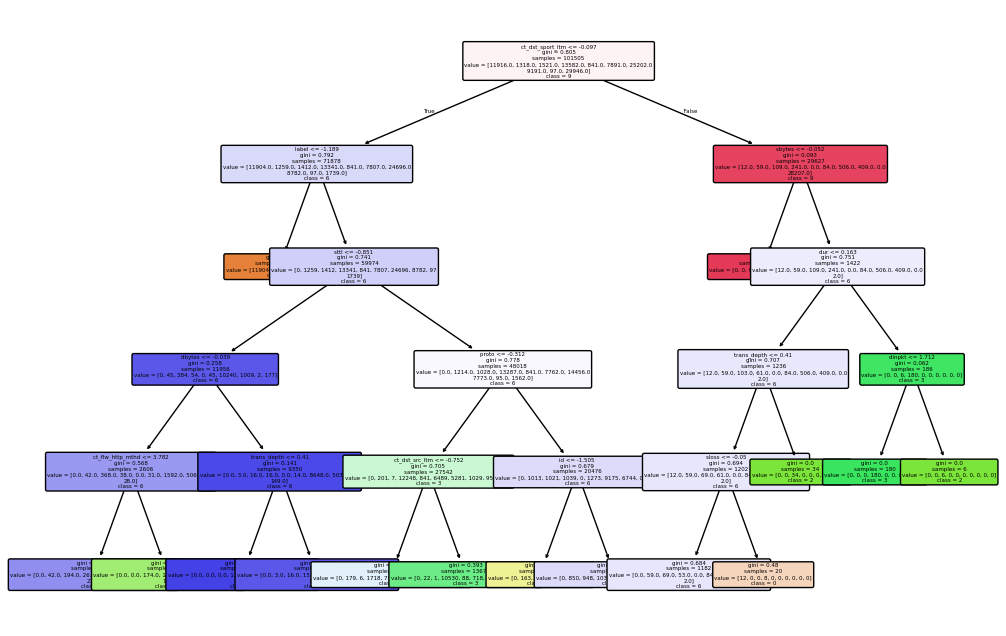

In [42]:
# Plot the tree
plt.figure(figsize=(12, 8))

# Convert class names to strings
class_names = [str(name) for name in data['attack_cat'].unique()]
plot_tree(tree_clf, feature_names=x.columns, class_names=class_names, filled=True, rounded=True, fontsize=4)

plt.show()